# Things to find

# Data Visualization

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Reading data from search engine
from pandas_datareader import data

/home/simran/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
# To avoid division error in future 
from __future__ import division

In [5]:
stock_list = ['AAPL','GOOG','MSFT','AMZN']

# Add start & end date for stocks 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [6]:
# Creating data frame for all stocks 

for stock in stock_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-09,201.679993,196.660004,200.399994,200.720001,34908600.0,197.591827
2019-05-10,198.850006,192.770004,197.419998,197.179993,41208700.0,194.854507
2019-05-13,189.479996,182.850006,187.710007,185.720001,57430600.0,183.529678
2019-05-14,189.699997,185.410004,186.410004,188.660004,36529700.0,186.434998
2019-05-15,191.750000,186.020004,186.270004,190.919998,26544700.0,188.668335


In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,249.313676,243.700831,246.147075,246.747272,3.357410e+07,245.166353
std,43.655847,42.439106,42.875771,43.273010,1.718646e+07,43.676699
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,207.229996,203.839996,205.860001,206.490005,2.190340e+07,204.578476
50%,249.250000,241.210007,246.500000,244.929993,2.853960e+07,244.268768
75%,284.540009,278.200012,280.529999,282.799988,3.778130e+07,282.036530
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


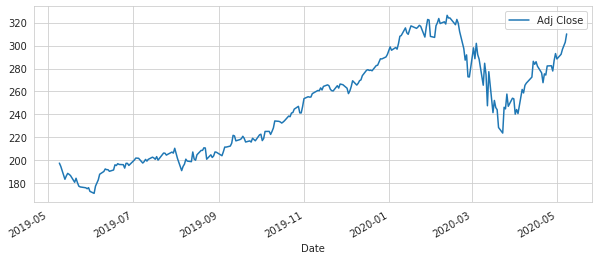

In [9]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

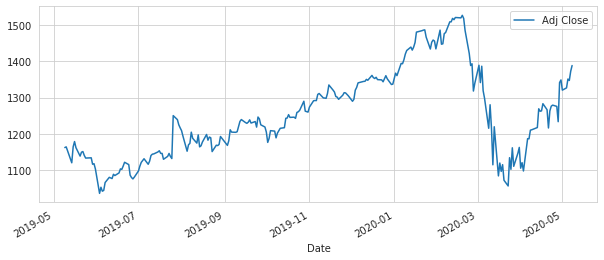

In [10]:
GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

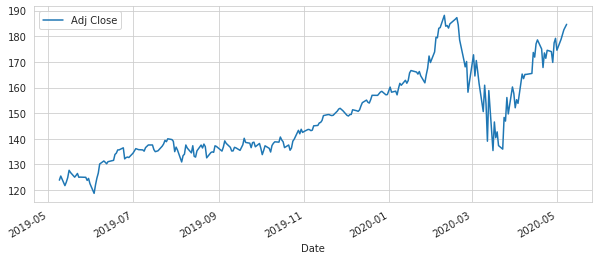

In [11]:
MSFT['Adj Close'].plot(legend=True,figsize=(10,4))

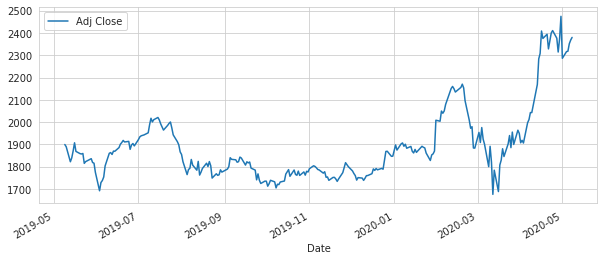

In [12]:
AMZN['Adj Close'].plot(legend=True,figsize=(10,4))

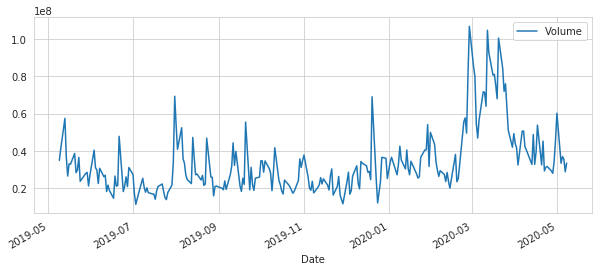

In [13]:
# Plotting the Volume

AAPL['Volume'].plot(legend=True,figsize=(10,4))

Pandas has build-in rolling mean calculator

In [14]:
ma_list = [50,70,90]

for ma in ma_list:
    
    column_name = 'MA in %s days' %str((ma))
    
    AAPL[column_name] = pd.Series.rolling((AAPL['Adj Close']),ma).mean()
    GOOG[column_name] = pd.Series.rolling((GOOG['Adj Close']),ma).mean()
    MSFT[column_name] = pd.Series.rolling((MSFT['Adj Close']),ma).mean()
    AMZN[column_name] = pd.Series.rolling((AMZN['Adj Close']),ma).mean()

In [15]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA in 50 days,MA in 70 days,MA in 90 days
Date,,,,,,,,,
2019-05-09,1169.660034,1150.849976,1159.030029,1162.380005,1185700,1162.380005,NaN,NaN,NaN
2019-05-10,1172.599976,1142.500000,1163.589966,1164.270020,1314500,1164.270020,NaN,NaN,NaN
2019-05-13,1147.939941,1122.109985,1141.959961,1132.030029,1860600,1132.030029,NaN,NaN,NaN
2019-05-14,1140.420044,1119.550049,1137.209961,1120.439941,1836600,1120.439941,NaN,NaN,NaN
2019-05-15,1171.329956,1116.666016,1117.869995,1164.209961,2289300,1164.209961,NaN,NaN,NaN


DAILY RETURN - daily changes of the stock, and not just its absolute value to analyze the risk of the stock 

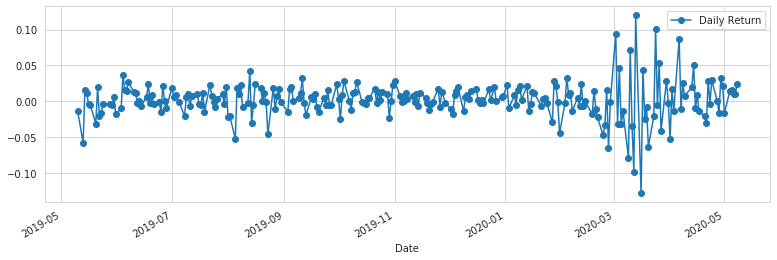

In [16]:
# Daily return is the pct_change in each day closing price

AAPL['Daily Return']= AAPL['Adj Close'].pct_change()

# plot the daily returns
AAPL['Daily Return'].plot(figsize=(13,4), legend= True, marker='o')

In [17]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA in 50 days,MA in 70 days,MA in 90 days,Daily Return
Date,,,,,,,,,,
2019-05-09,201.679993,196.660004,200.399994,200.720001,34908600.0,197.591827,NaN,NaN,NaN,NaN
2019-05-10,198.850006,192.770004,197.419998,197.179993,41208700.0,194.854507,NaN,NaN,NaN,-0.013853
2019-05-13,189.479996,182.850006,187.710007,185.720001,57430600.0,183.529678,NaN,NaN,NaN,-0.058119
2019-05-14,189.699997,185.410004,186.410004,188.660004,36529700.0,186.434998,NaN,NaN,NaN,0.015830
2019-05-15,191.750000,186.020004,186.270004,190.919998,26544700.0,188.668335,NaN,NaN,NaN,0.011979


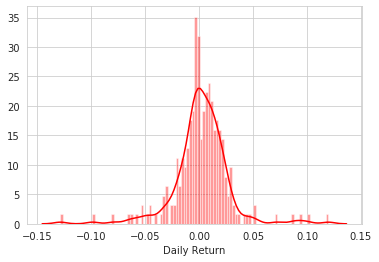

In [18]:
# Using sns, distplot= histo+kde
# Also, sns maps cannot take NaN value, therefore use of dropna()

sns.distplot(AAPL['Daily Return'].dropna(), bins= 100, color='red')
# Could have also done:
#AAPL['Daily Return'].hist()

In [19]:
# Create df for DR and CP
headers= ['AAPL','GOOG','MSFT','AMZN']
data = [AAPL['Adj Close'],GOOG['Adj Close'],MSFT['Adj Close'],AMZN['Adj Close']]
CP_df = pd.concat(data, axis=1, keys = headers)
#CP_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
CP_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-09,197.591827,1162.380005,123.861244,1899.869995
2019-05-10,194.854507,1164.270020,125.469955,1889.979980
2019-05-13,183.529678,1132.030029,121.739311,1822.680054
2019-05-14,186.434998,1120.439941,123.101303,1840.119995
2019-05-15,188.668335,1164.209961,124.834839,1871.150024


In [20]:
DR_df = CP_df.pct_change()
DR_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-09,NaN,NaN,NaN,NaN
2019-05-10,-0.013853,0.001626,0.012988,-0.005206
2019-05-13,-0.058119,-0.027691,-0.029733,-0.035609
2019-05-14,0.015830,-0.010238,0.011188,0.009568
2019-05-15,0.011979,0.039065,0.014082,0.016863


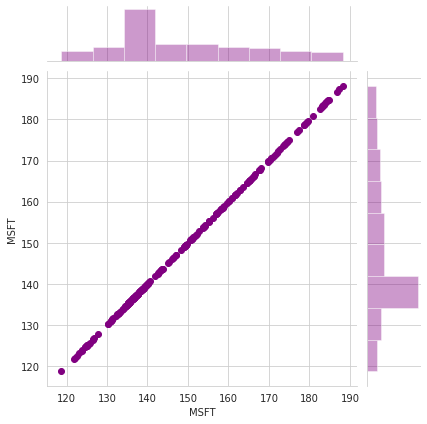

In [21]:
# We use jointplot to analyze the correlation
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot('MSFT','MSFT',CP_df, color='purple', kind ='scatter')

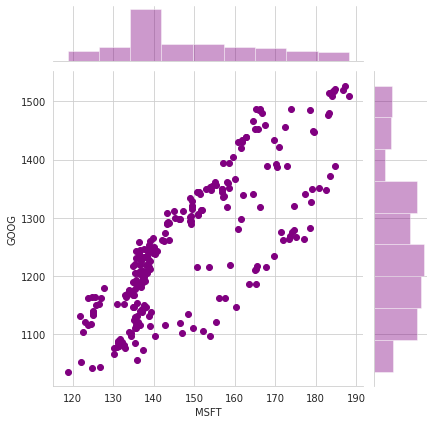

In [22]:
# Comparing 2 stocks
sns.jointplot('MSFT','GOOG',CP_df, color='purple', kind ='scatter')

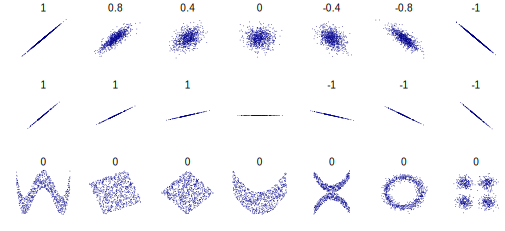

In [23]:
#1 = Highly correlated
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

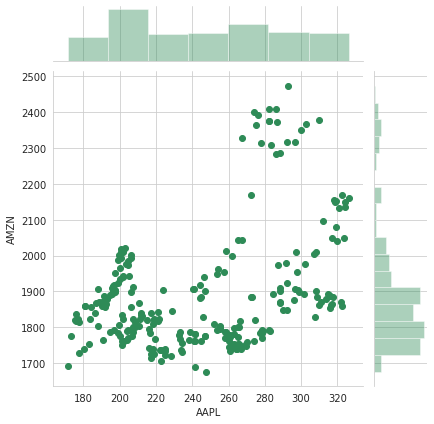

In [24]:
sns.jointplot('AAPL','AMZN',CP_df, color='seagreen', kind ='scatter')

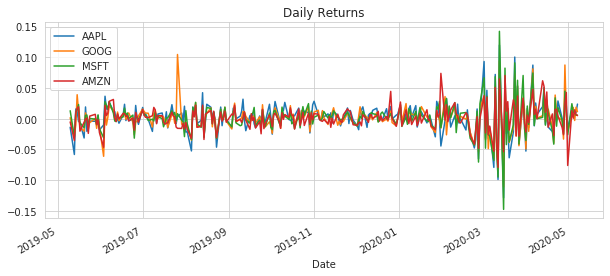

In [25]:
DR_df.plot(figsize=(10,4), legend=True, title='Daily Returns')

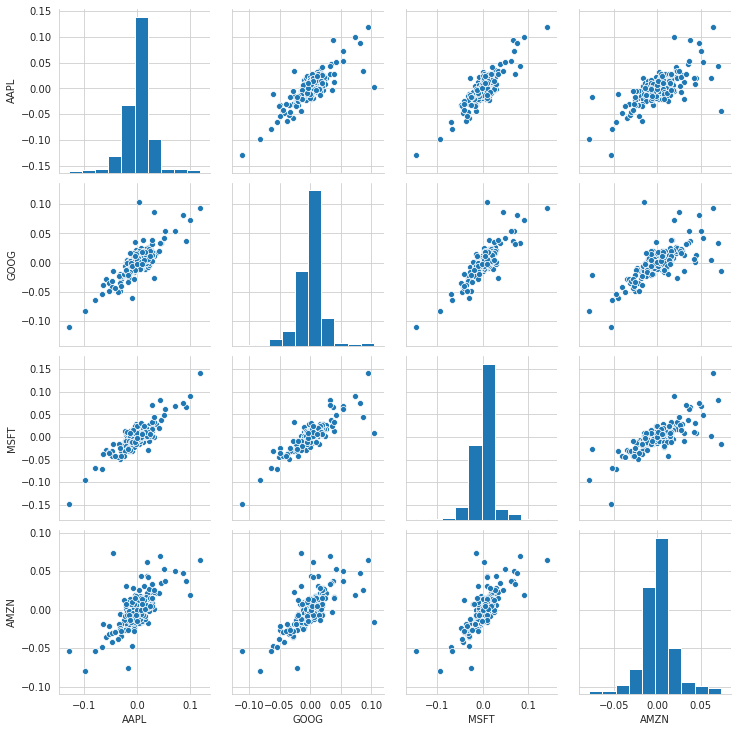

In [26]:
# Use pairplot for all comparisons

sns.pairplot(DR_df.dropna())

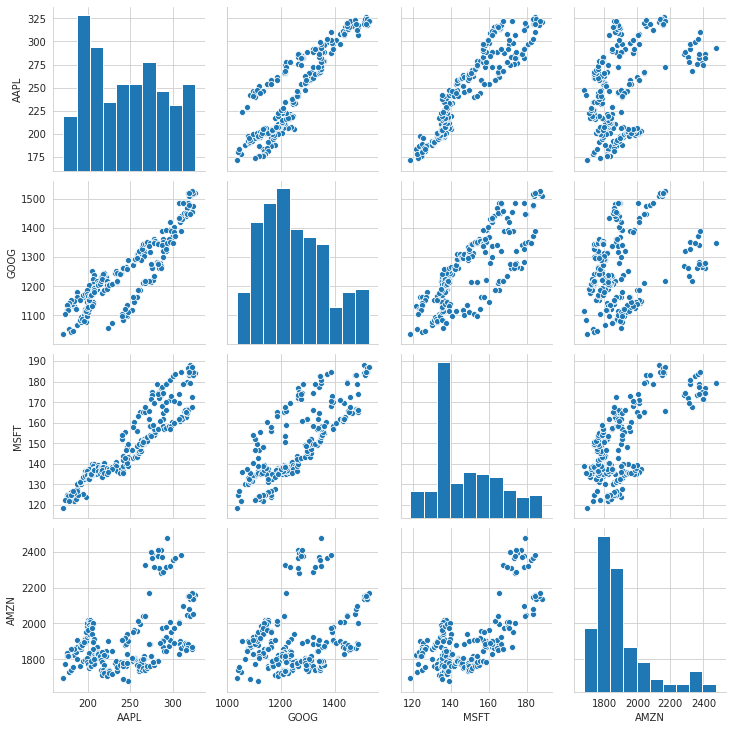

In [27]:
sns.pairplot(CP_df.dropna())

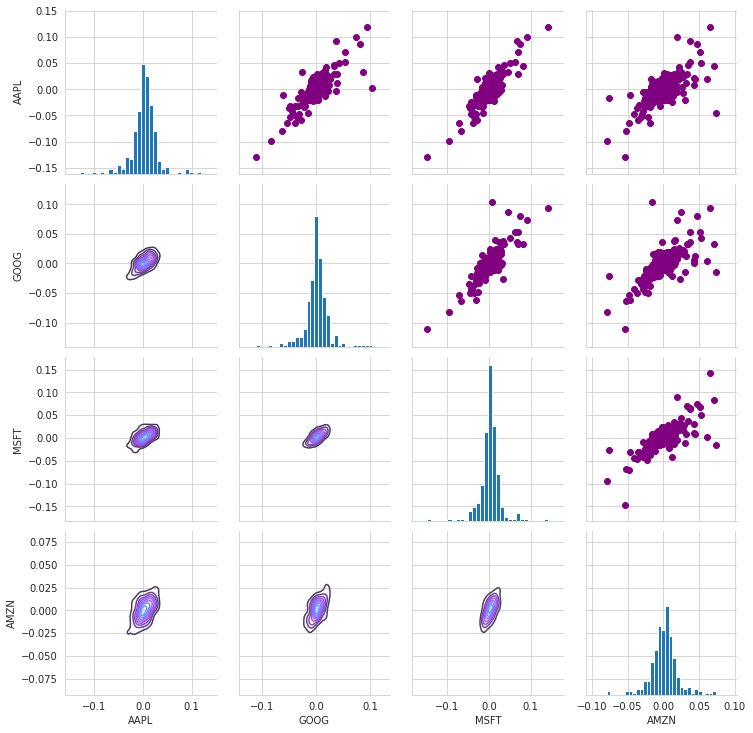

In [28]:
returns_fig = sns.PairGrid(DR_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins= 30)

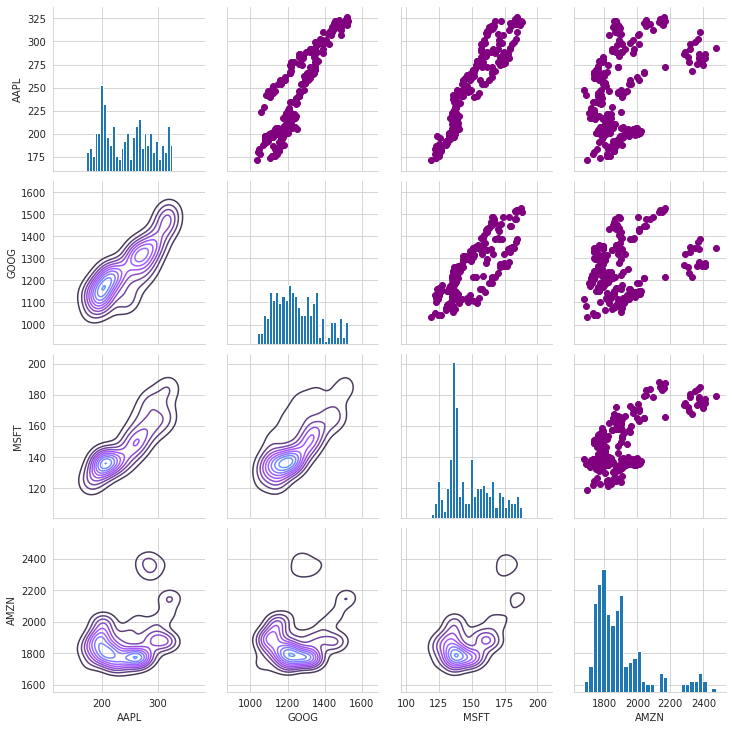

In [29]:
returns_fig = sns.PairGrid(CP_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins= 30)

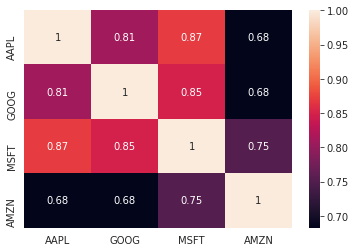

In [30]:
# To see the correlation values, we plot a heatmap

corr = DR_df.dropna().corr() #find the pairwise correlation of all columns
mask = np.zeros_like(corr) #Return an array of zeros with the same shape and type as a given array

sns.heatmap(corr, annot = True, mask =mask)

From the map we can concur that (MSFT, AAPL) has highest correlation, followed by (MSFT, GOOG), (GOOG,AAPL), (AMZN, APPL),(AMZN,GOOG), (AMZN,MSFT)

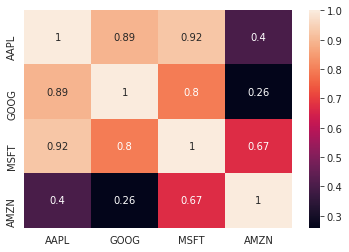

In [31]:
# For closing prices
corr = CP_df.dropna().corr() #find the pairwise correlation of all columns
mask = np.zeros_like(corr) #Return an array of zeros with the same shape and type as a given array

sns.heatmap(corr, annot = True, mask =mask)

(MSFT, AAPL),(GOOG, AAPL),(MSFT,GOOG),(MSFT,AMZN),(AMZN,AAPL),(AMZN,GOOF)

# RISK ANALYSIS

In [32]:
# Create a new df

returns = DR_df.dropna()

(0.0, 0.004)

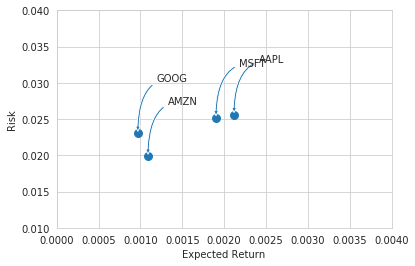

In [86]:
area = np.pi*20 #area of scatter circle(make them visible)

plt.scatter(returns.mean(),returns.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# For the Annotations on the graph
# here label= columns of ret df, x=mean & y=sd
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'angle3, angleA=0,angleB=90'))

#Since the annotations were overlapping, set xlim & ylim to adjust the graph

plt.ylim([0.010,0.040])
plt.xlim([0.000,0.004])

# VALUE AT RISK

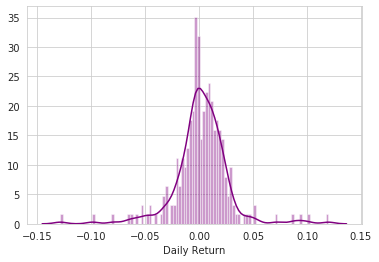

In [89]:
sns.distplot(AAPL['Daily Return'].dropna(), bins =100,color='purple')

In [91]:
returns.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-10,-0.013853,0.001626,0.012988,-0.005206
2019-05-13,-0.058119,-0.027691,-0.029733,-0.035609
2019-05-14,0.015830,-0.010238,0.011188,0.009568
2019-05-15,0.011979,0.039065,0.014082,0.016863
2019-05-16,-0.004400,0.012687,0.023092,0.019464


In [92]:
returns['AAPL'].quantile(0.05)

-0.03425838271082968

In [93]:
returns['AMZN'].quantile(0.05)

-0.028128624803580866

In [94]:
returns['GOOG'].quantile(0.05)

-0.03459902274899712

In [95]:
returns['MSFT'].quantile(0.05)

-0.032940595565638345

# VaR with Monte Carlo method

Calculate Probability of different outcomes in a process. It is used to understand the impact of risk and uncertainty in prediction and forecasting models

We'll use random market conditions then calculate losses for each condition

Finally, use aggregation of all these simulations to establish how risky the stock is.

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$

S= stock price, mu= expected return (which we calculated earlier),sigma= standard deviation of the returns, t= time, and epsilon= random variable

Reduced version --> $$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$

Change in the stock price = stock price x (drift + shock)

In [104]:
# Start with few simulations & GOOG DF

days = 365
# Alloting Values to variables 

dt = 1/365
mu = returns.mean()['GOOG']
sigma = returns.std()['GOOG']

# Create a function 

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days) #arrays of zeros with length = days 
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        #Calculate shock, random.normal = gives random samples from a normal distribution
        # Since shock has epislon,chse np.random.normal
        shock[x] = np.random.normal(loc= mu*dt , scale = sigma*np.sqrt(dt))
        
        #Calculate Drift
        drift[x] = mu*dt
        
        #Calculate price 
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [105]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA in 50 days,MA in 70 days,MA in 90 days
Date,,,,,,,,,
2019-05-09,1169.660034,1150.849976,1159.030029,1162.380005,1185700,1162.380005,NaN,NaN,NaN
2019-05-10,1172.599976,1142.500000,1163.589966,1164.270020,1314500,1164.270020,NaN,NaN,NaN
2019-05-13,1147.939941,1122.109985,1141.959961,1132.030029,1860600,1132.030029,NaN,NaN,NaN
2019-05-14,1140.420044,1119.550049,1137.209961,1120.439941,1836600,1120.439941,NaN,NaN,NaN
2019-05-15,1171.329956,1116.666016,1117.869995,1164.209961,2289300,1164.209961,NaN,NaN,NaN


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

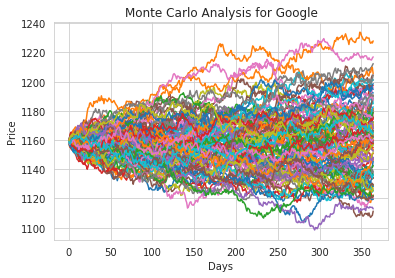

In [107]:
start_price = 1159.03

for run in range(100):
    
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [124]:

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
3#p.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

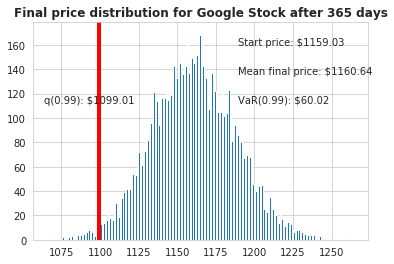

In [125]:

# Now we'll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')